In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_excel("dataset/insurance_claims_data.xlsx")

In [9]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

Now that we see 39 features, lets perform some data visualization to understand the data in a better manner.

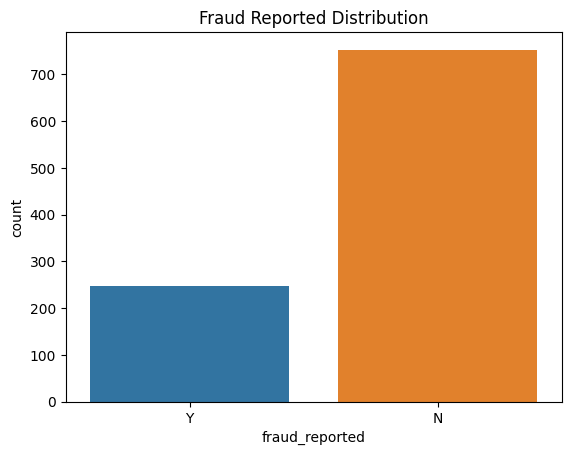

In [10]:
#Lets see the count of fraud reported.
def show_fraud_reports(data):
    sns.countplot(x='fraud_reported', data=data)
    plt.title('Fraud Reported Distribution')
    plt.show()

#calling the method within the same cell:
show_fraud_reports(data)

We can notice, the fact that out of these 1000 records, close to 250 are classified as Fraudulent claims.

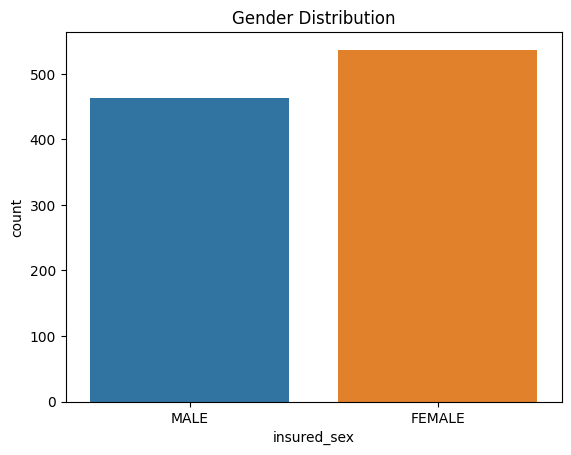

In [11]:
#now lets see the gender ratio as to all claims.
def plot_gender(data):
    sns.countplot(x='insured_sex', data=data)
    plt.title('Gender Distribution')
    plt.show()

plot_gender(data)

Well, the graph shows close to equal ratio of Male claims to Female filed claims. This is important, in the case that there are a lot more Male claims such that count of female claims is insignificant, then the classifier might either never predict a female driver to have commited fraud, or might tend to predict that male driver commited fraud more often.

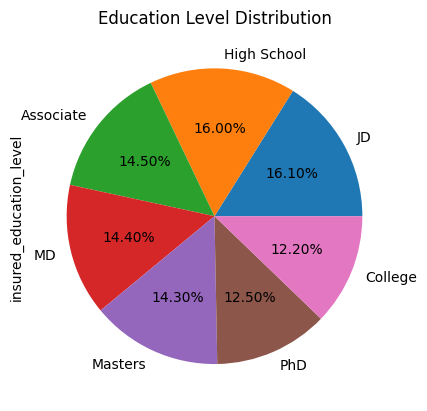

In [12]:
#Now lets see the distribution for education level among people.
def plot_education_level(data):
    data['insured_education_level'].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title('Education Level Distribution')
    plt.show()

plot_education_level(data)

If we are to look at this pie chart above, there is no class of specific education which seems to have significantly high proportion to the other.

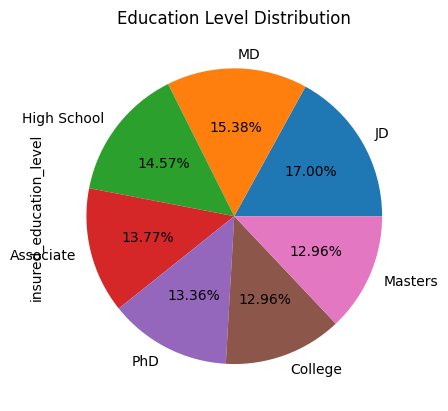

In [14]:
#Lets see the education distribution for those who have tried to commit fraud.
def plot_fraudulent_education_level(data):
    data['insured_education_level'].loc[data["fraud_reported"] == 'Y'].value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.title('Education Level Distribution')
    plt.show()

plot_fraudulent_education_level(data)

We still cannot see a huge shift in terms of any education level.

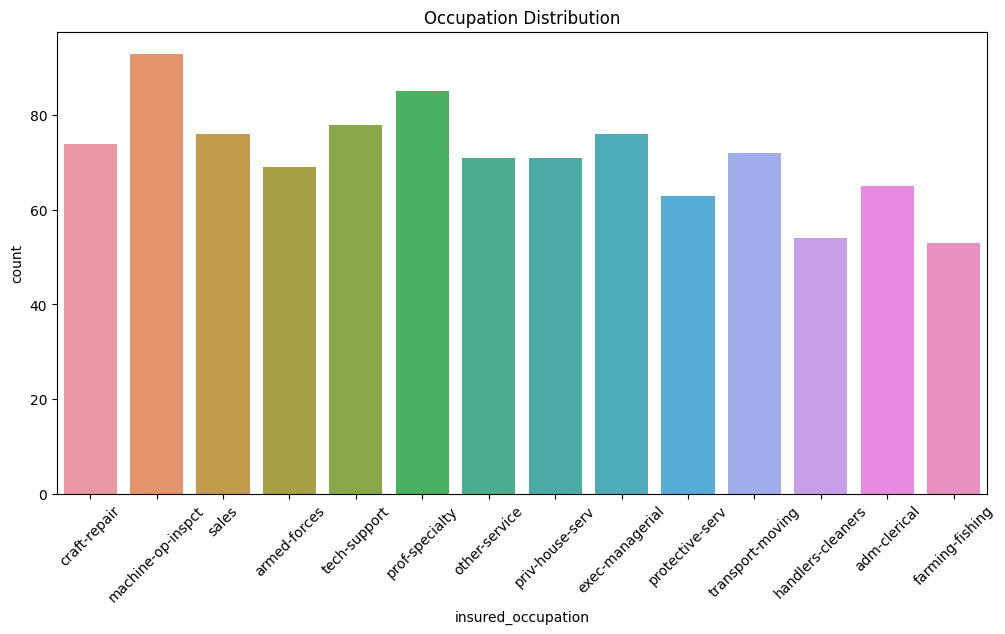

In [15]:
#lets understand their employment status:
def plot_occupation(data):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='insured_occupation', data=data)
    plt.title('Occupation Distribution')
    plt.xticks(rotation=45)
    plt.show()

plot_occupation(data)


Let's check the employment standing for those who have been reported to have commited fraud.

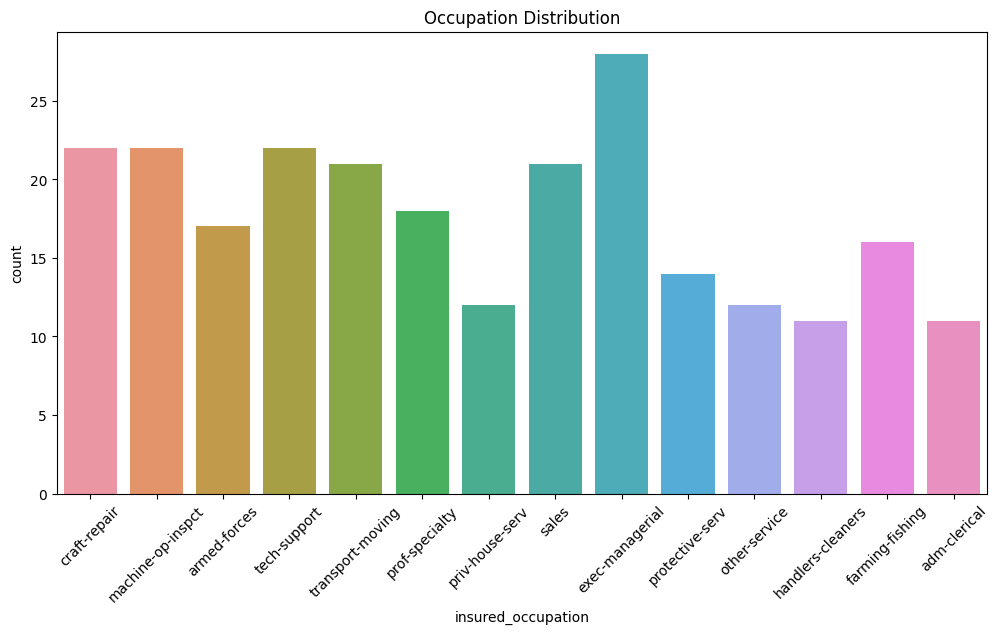

In [16]:
def plot_fraudulent_occupation(data):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='insured_occupation', data=data.loc[data['fraud_reported'] == 'Y'])
    plt.title('Occupation Distribution')
    plt.xticks(rotation=45)
    plt.show()

plot_fraudulent_occupation(data)

So far, we've tried to understand who and why would any person want to commit an insurance fraud,

with the graphs above, I can now prove my following assumptions wrong.

 - People with financial need might commit fraud.
 - People with lower education might commit fraud more often.

The plots show that these hypothesis are wrong.

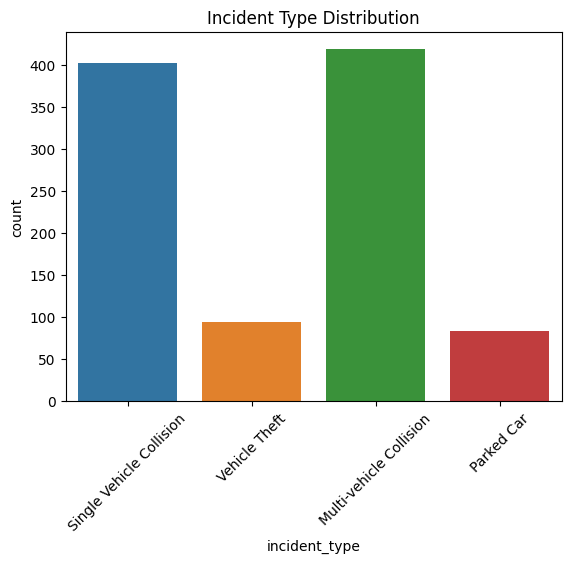

In [17]:
#Lets understand the incidents.
def plot_incident_type(data):
    sns.countplot(x='incident_type', data=data)
    plt.title('Incident Type Distribution')
    plt.xticks(rotation=45)
    plt.show()

plot_incident_type(data)

Clearly vehicle collision is the most common cause for filing an Insurance claim. I assume that this would not change even for fraudulent claims, because close to 80% of the claims are made on these two causes: Single Vehicle Collision and Multi-vehicle Collison.


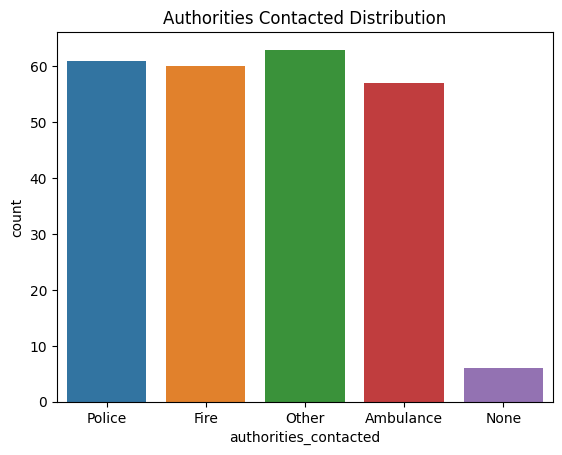

In [20]:
#lets see how often out of these Fradulent claims, police were contacted.
def plot_authorities_contacted(data):
    sns.countplot(x='authorities_contacted', data=data.loc[data['fraud_reported'] == 'Y'])
    plt.title('Authorities Contacted Distribution')
    plt.show()


plot_authorities_contacted(data)

Until now, I tried to understand the Meta data and compare various counts, I shall now plot some scatter plots to rule out additional hypothesises.

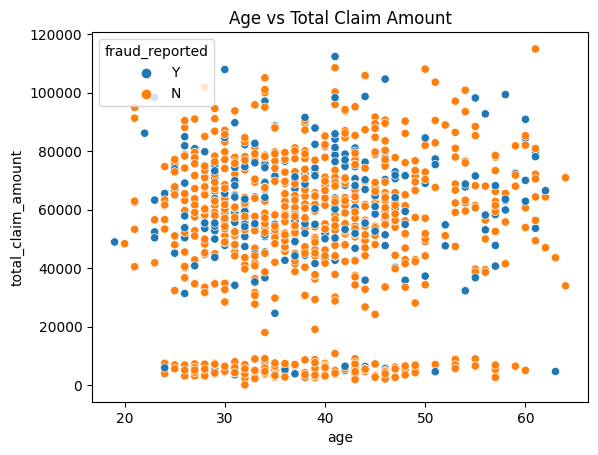

In [21]:
def plot_age_vs_amount(data):
    sns.scatterplot(x='age', y='total_claim_amount', data=data, hue='fraud_reported')
    plt.title('Age vs Total Claim Amount')
    plt.show()

plot_age_vs_amount(data)

Two immediate observations can be made:
- Most of the claims including Fraudulent, were made by people of age between 25 to 53.
- Most of the claims filed for repairs have an expense over $20,000.

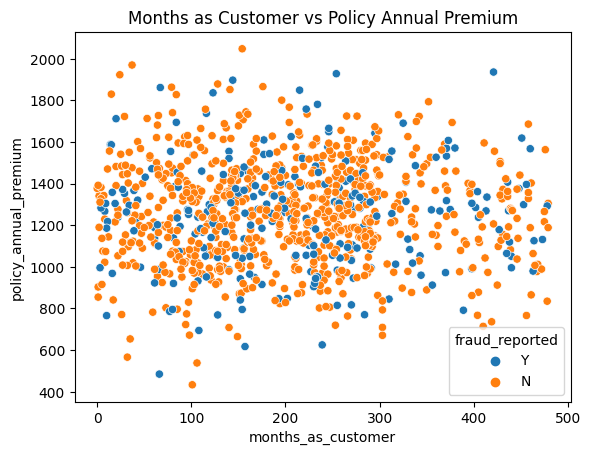

In [22]:
def plot_months_as_customer_vs_policy_annual_premium(data):
    sns.scatterplot(x='months_as_customer', y='policy_annual_premium', data=data, hue='fraud_reported')
    plt.title('Months as Customer vs Policy Annual Premium')
    plt.show()

plot_months_as_customer_vs_policy_annual_premium(data)

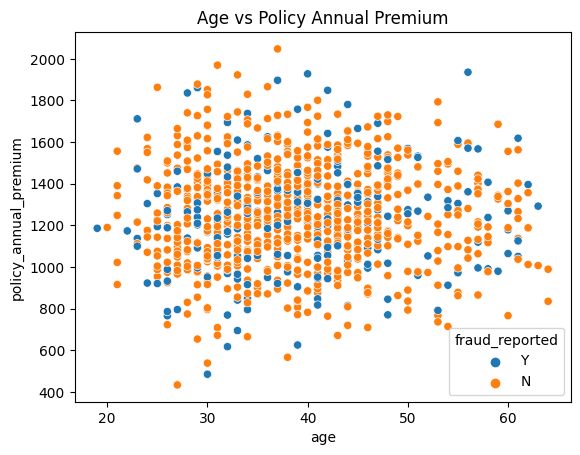

In [23]:
def plot_age_vs_policy_annual_premium(data):
    sns.scatterplot(x='age', y='policy_annual_premium', data=data, hue='fraud_reported')
    plt.title('Age vs Policy Annual Premium')
    plt.show()

plot_age_vs_policy_annual_premium(data)

I want to understand which age group has the highest count for false claims.

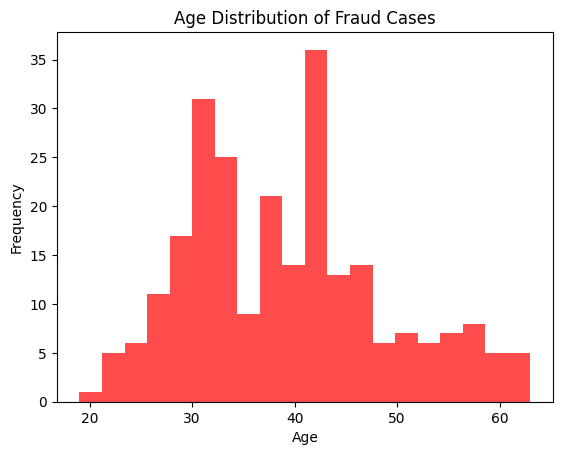

In [24]:
def plot_age_histogram_fraud(data):
    fraud_data = data[data['fraud_reported'] == 'Y']
    plt.hist(fraud_data['age'], bins=20, alpha=0.7, color='red')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution of Fraud Cases')
    plt.show()
plot_age_histogram_fraud(data)

Seems like, people in their early 30s, and early 40s, have made a lot more false claims than any other age group.

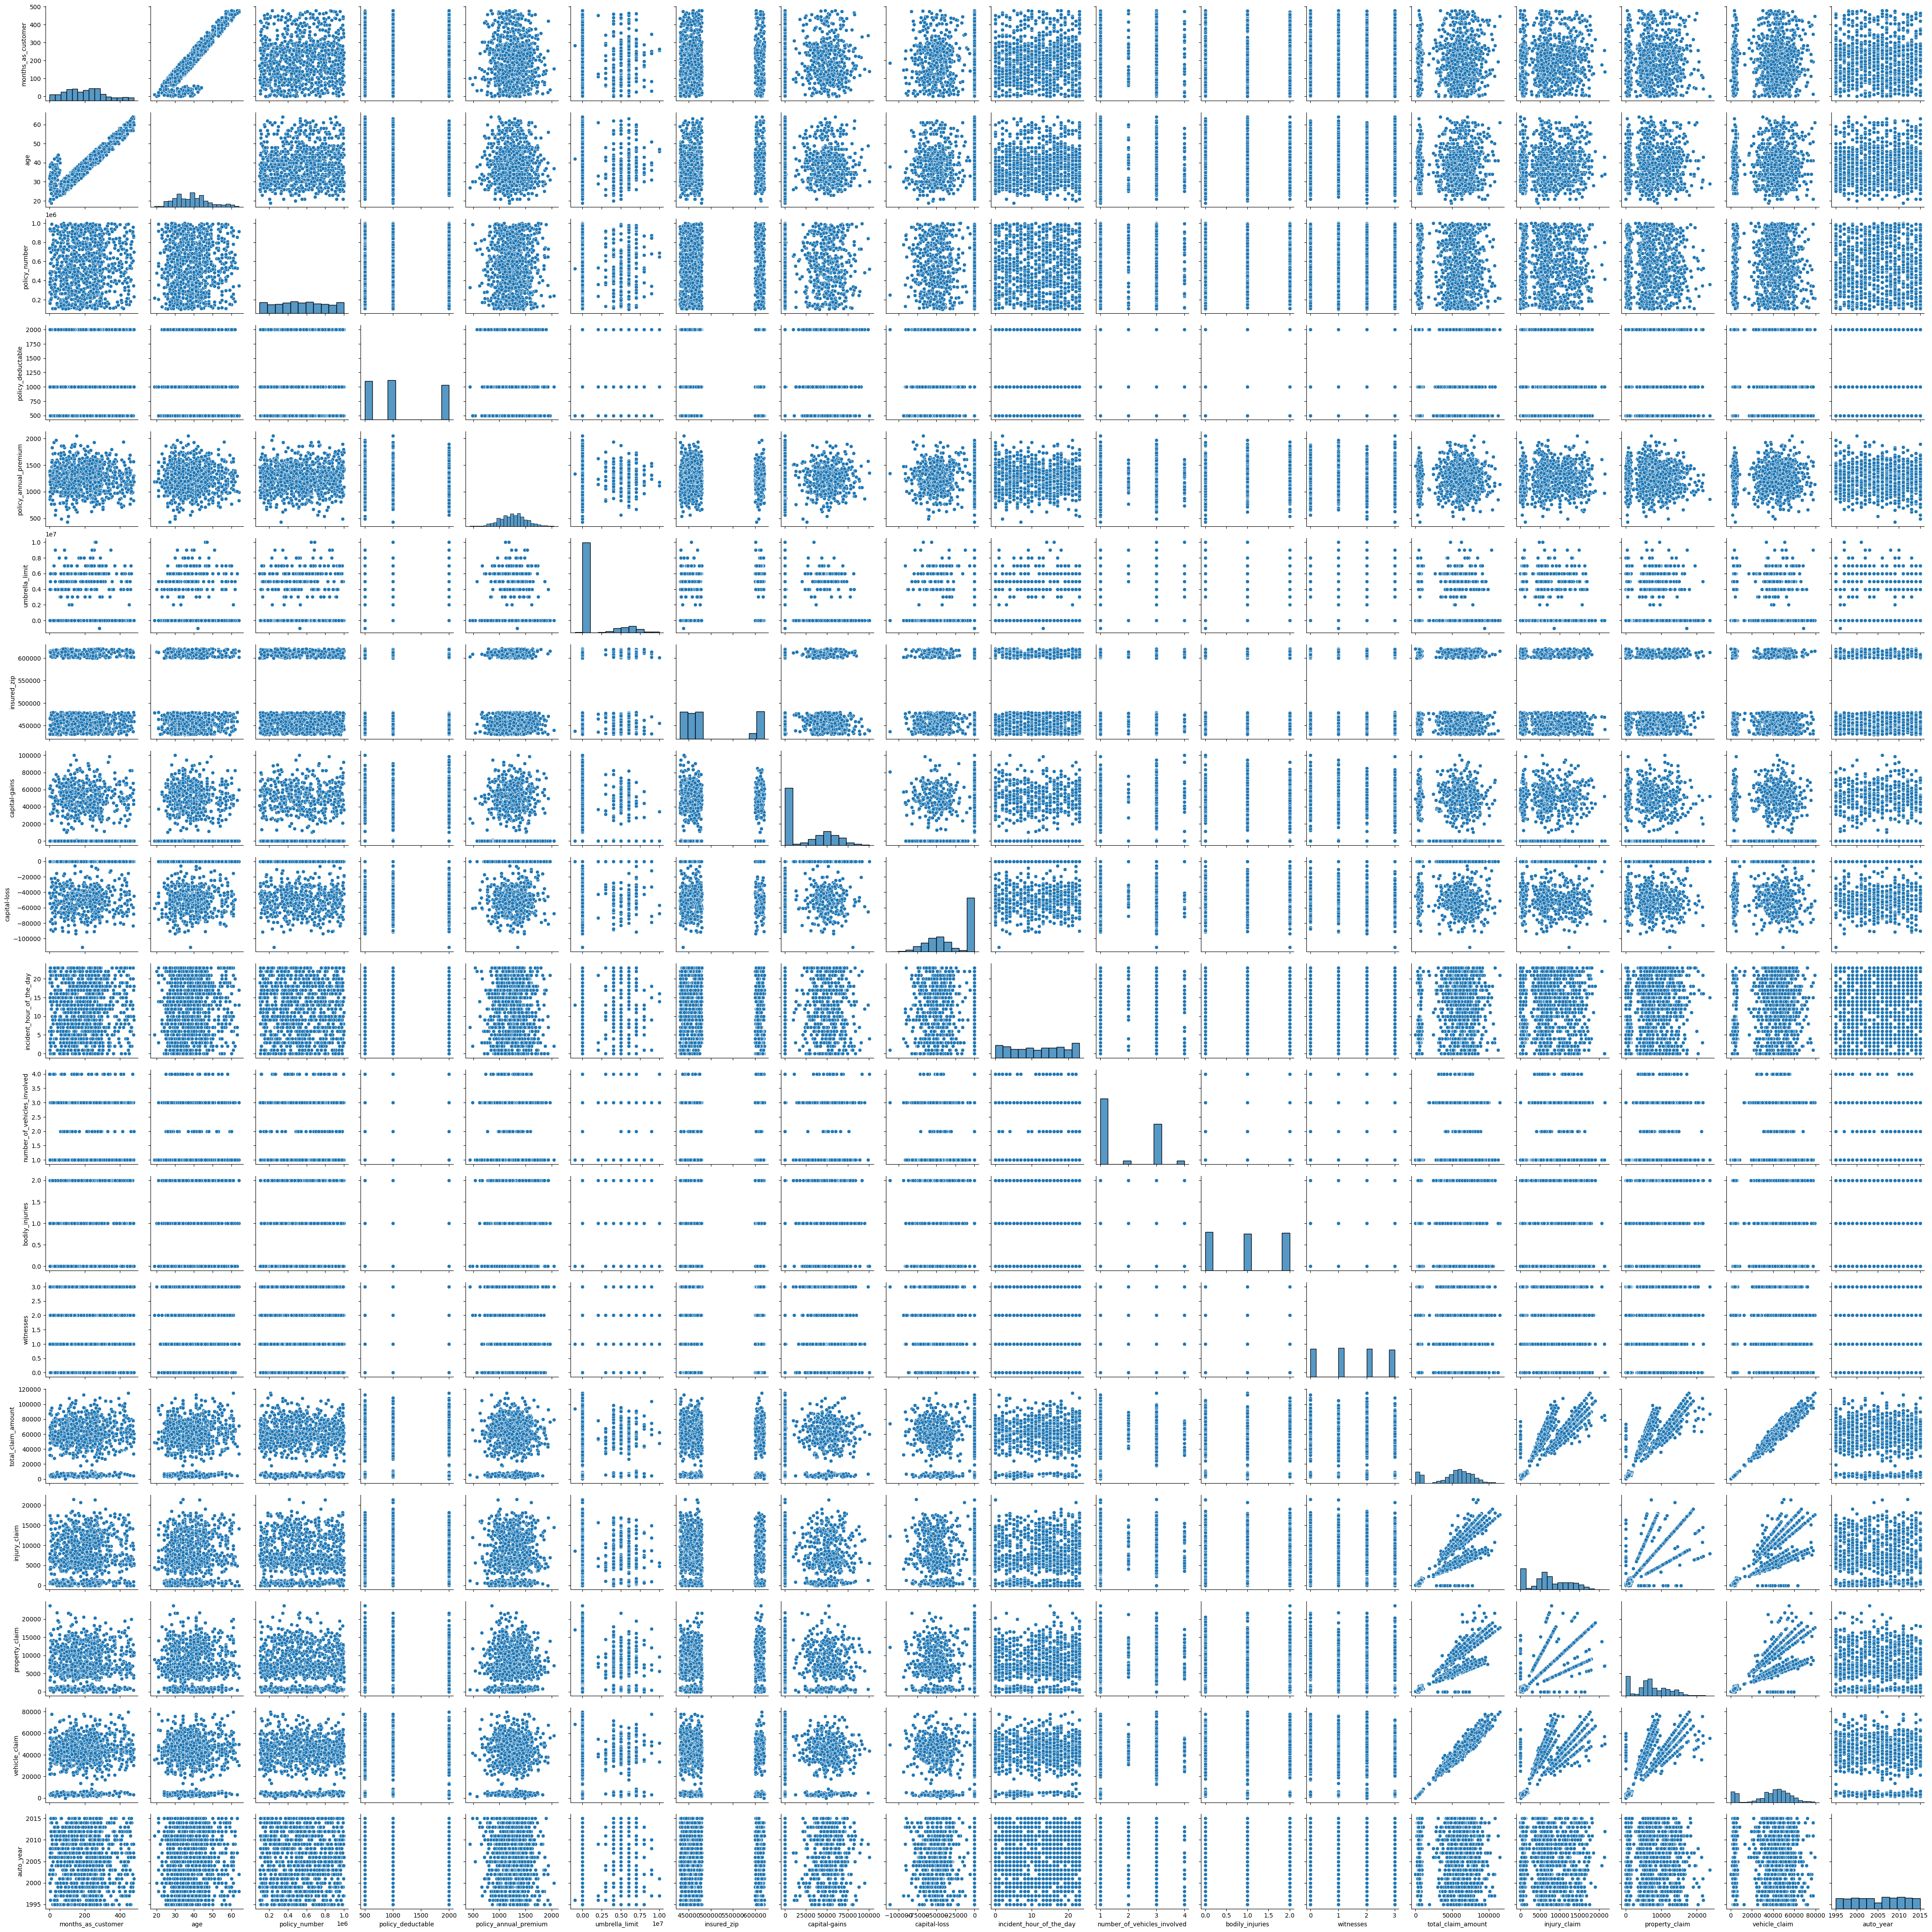

In [25]:
#lets just plot all possible pairs.

def plot_pairwise(data):
    sns.pairplot(data)
    plt.show()

plot_pairwise(data)

Well, clearly the data is balanced and does not skew the decision to have direct dependency on one feature. However the only possible challenge could be lack of data. If we are to split this set for validation. We would have to then work with less training data, which might result in a underfitted classifier.